# Preparing Colab for Assignment
FAQ on this [doc](https://docs.google.com/document/d/1eZP6pzl1RKNefTja7-nU_C1k1cpVqh4Y0eVmdb3ZQa8/edit?usp=sharing).

## Utils

In [2]:
def show_gray(img,title=""):
  """
  Function to show grayscale image
  """
  plt.imshow(img,cmap='gray')
  plt.title(title)

## Download the Dataset

In [3]:
#taken from this StackOverflow answer: https://stackoverflow.com/a/39225039
import requests

def download_file_from_google_drive(id, destination):
    URL = "https://docs.google.com/uc?export=download"

    session = requests.Session()

    response = session.get(URL, params = { 'id' : id }, stream = True)
    token = get_confirm_token(response)

    if token:
        params = { 'id' : id, 'confirm' : token }
        response = session.get(URL, params = params, stream = True)

    save_response_content(response, destination)    

def get_confirm_token(response):
    for key, value in response.cookies.items():
        if key.startswith('download_warning'):
            return value

    return None

def save_response_content(response, destination):
    CHUNK_SIZE = 32768

    with open(destination, "wb") as f:
        for chunk in response.iter_content(CHUNK_SIZE):
            if chunk: # filter out keep-alive new chunks
                f.write(chunk)

file_id = '1Z73UHw9IS492qxHvNUiB7-DidVl_ePfg'
destination = '/content/dataset.zip'
download_file_from_google_drive(file_id, destination)

In [4]:
!unzip -q dataset.zip
!rm -rf dataset.zip

# Metrics
Here you need to complete the MSE and PSNR metrics formula which will be used later on to test the automated grader. Please do not change the function definitions. Else the grader will fail.

Objective: To complete the given functions for **0.6 mark** each.


In [5]:
import numpy as np
from skimage.metrics import mean_squared_error, peak_signal_noise_ratio

from PIL import Image
import math
def MSE(image1,image2):
  """ 
  Mean Squared Error
  :param image1: image1
  :param image2: image2
  :rtype: float
  :return: MSE value
  """
  # [TODO]
  return np.mean((image1-image2)**2)

def PSNR(image1, image2, peak=255):
  """ 
  Peak signal-to-noise ratio
  :param image1: image1
  :param image2: image2
  :param peak: max value of pixel 8-bit image (255)
  :rtype: float
  :return: PSNR value
  """
  # [TODO]
  a1=MSE(image1,image2)
  if a1==0:
      return 0
  psnr=20*math.log(peak,10)-10*math.log(a1,10)
  return psnr

In [6]:
#@title Grader { vertical-output: true }
seed =  200#@param {type:"integer"}
# Grader, please don't touch [Can run to check] [seed will be changed later]
from skimage.metrics import mean_squared_error, peak_signal_noise_ratio
import numpy as np
np.random.seed(seed)
image1 = np.random.randint(0,256,(1280,720,3))
image2 = np.random.randint(0,256,(1280,720,3))

print(f"Skimage -> PSNR: {peak_signal_noise_ratio(image1,image2,data_range=255):.4f} | MSR: {mean_squared_error(image1,image2):.4f}")
print(f"My Func -> PSNR: {PSNR(image1,image2):.4f} | MSR: {MSE(image1,image2):.4f}")

Skimage -> PSNR: 7.7475 | MSR: 10922.7525
My Func -> PSNR: 7.7475 | MSR: 10922.7525


# Creating Noisy Images
***Objective:*** To complete the given class functions for **1 mark** each. 

>  MSE: To match within error of +- 2.0 \
  PSNR: To match within error of +- 200.0


## Salt n Pepper Noise
you can read about this more [here](https://en.wikipedia.org/wiki/Salt-and-pepper_noise).

## Gaussian Noise
you can read about this more [here](https://en.wikipedia.org/wiki/Gaussian_noise). 

In [7]:
from skimage.util import random_noise
import numpy as np
import math

class noisy_system():
  def example(self,img,**kwargs):
    """
    An example function to test expected return.
    You can read more about skimage.util.random_noise at https://scikit-image.org/docs/dev/api/skimage.util.html#skimage.util.random_noise
    """
    noisy_image = random_noise(img,**kwargs)
    noisy_image = np.uint8(noisy_image*255)
    return noisy_image

  def create_salt_and_pepper_noise(self,img,amount=0.05):
    """
    function to create salt and pepper noise
    :param image: input image
    :rtype: uint8 (w,h)
    :return: noisy image
    
    """
    img=np.array(img)
    #print(img.shape)
    for i in range(img.shape[0]):
        indices = np.random.choice(np.arange(img.shape[1]), replace=False, size=int(img.shape[1] * amount/2))
        img[i][indices]=0
        indices2 = np.random.choice(np.arange(img.shape[1]), replace=False, size=int(img.shape[1] * amount/2))
        img[i][indices2]=255
    
    return img

  def create_gaussian_noise(self,img,mean=0,var=0.01):
    """
    function to create gaussian noise
    :param image: input image
    :rtype: uint8 (w,h)
    :return: noisy image
    """
    # [TODO]
    
    img=np.array(img)
    sig=var**0.5
    gauss = np.random.normal(mean,sig,img.shape)
    img = img + gauss*(95)
    return img

Total Time taken: 0.06s

Statistics:
Example   => SNP -> PSNR: 40.87 | MSE: 5.33
Example   => GSN -> PSNR: 28.43 | MSE: 93.36
My Func   => SNP -> PSNR: 41.13 | MSE: 5.01
My Func   => GSN -> PSNR: 28.56 | MSE: 90.58


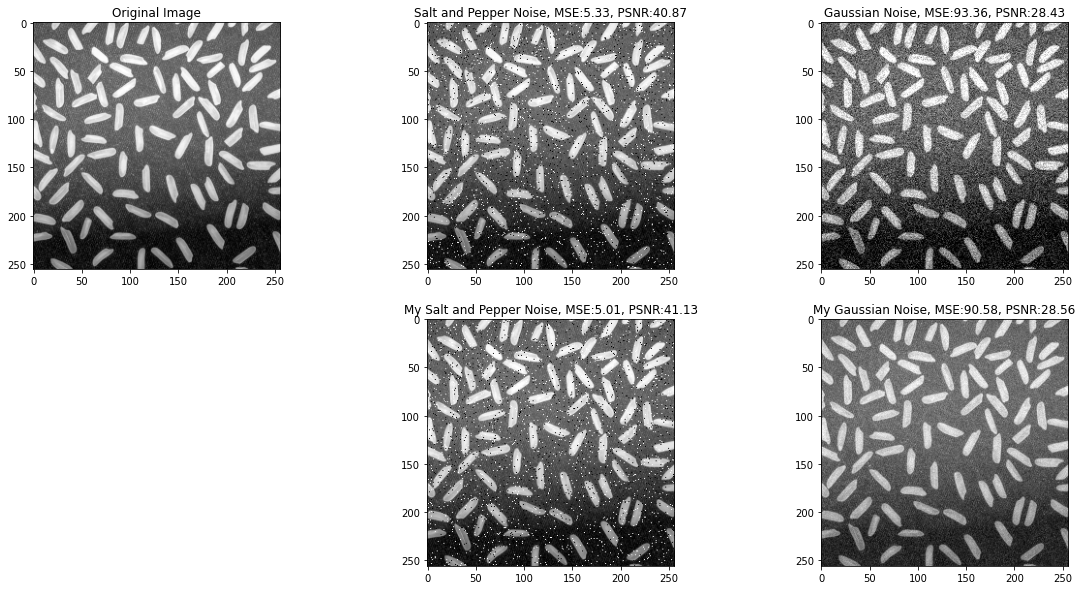

In [8]:
#@title Grader { vertical-output: true, display-mode: "form" }
image_number = 8 #@param {type:"slider", min:1, max:10, step:1}
# Grader, please don't touch [Can run to check] [will be graded on an image decided later]
# %%timeit 
%matplotlib inline
import cv2
import time
import matplotlib.pyplot as plt
from IPython.display import clear_output

clear_output(wait=True)

start = time.time()

noise_maker               = noisy_system()
image                     = cv2.imread(f"/content/dataset/Image{image_number}.png")
image                     = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

salt_and_pepper_example   = noise_maker.example(image.copy(),mode="s&p")
gaussian_example          = noise_maker.example(image.copy(),mode="gaussian")
salt_and_pepper_image     = noise_maker.create_salt_and_pepper_noise(image.copy())
gaussian_image            = noise_maker.create_gaussian_noise(image.copy())

end = time.time()
print(f"Total Time taken: {end-start:.2f}s\n")
print("Statistics:")
print(f"Example   => SNP -> PSNR: {PSNR(salt_and_pepper_example,image):.2f} | MSE: {MSE(salt_and_pepper_example,image):.2f}")
print(f"Example   => GSN -> PSNR: {PSNR(gaussian_example,image):.2f} | MSE: {MSE(gaussian_example,image):.2f}")
print(f"My Func   => SNP -> PSNR: {PSNR(salt_and_pepper_image,image):.2f} | MSE: {MSE(salt_and_pepper_image,image):.2f}")
print(f"My Func   => GSN -> PSNR: {PSNR(gaussian_image,image):.2f} | MSE: {MSE(gaussian_image,image):.2f}")


plt.figure(figsize=(20,10))
plt.subplot(2,3,1)
show_gray(image,"Original Image")
plt.subplot(2,3,2)
show_gray(salt_and_pepper_example,
          f"Salt and Pepper Noise, MSE:{MSE(image,salt_and_pepper_example):.2f}, PSNR:{PSNR(image,salt_and_pepper_example):.2f}")
plt.subplot(2,3,3)
show_gray(gaussian_example,
          f"Gaussian Noise, MSE:{MSE(image,gaussian_example):.2f}, PSNR:{PSNR(image,gaussian_example):.2f}")
plt.subplot(2,3,5)
show_gray(salt_and_pepper_image,
          f"My Salt and Pepper Noise, MSE:{MSE(image,salt_and_pepper_image):.2f}, PSNR:{PSNR(image,salt_and_pepper_image):.2f}")
plt.subplot(2,3,6)
show_gray(gaussian_image,
          f"My Gaussian Noise, MSE:{MSE(image,gaussian_image):.2f}, PSNR:{PSNR(image,gaussian_image):.2f}")
plt.show()


# Non Local Means

***Primary Objective:*** To complete Non Local Means denoiser. **2 marks** for completetion.

***Secondary Objective:*** 
1. To optimise for **MSE**. (out of 1 mark *relatively*)
2. To optimise for **time**.  (out of 1 mark *relatively*)

In [23]:
class NLMeans():
  """
  Non Local Means, donot change the solve function. You may add any other class 
  functions or other functions in the colab file. but refrain for function/class
  definitions already given. These will be used to grade later on.
  """
  def example(self,img,**kwargs):
    denoised_image = cv2.fastNlMeansDenoising(img,**kwargs)
    return denoised_image

  def solve(self,img,h=30,small_window=7,big_window=21):
    """
    Solve function to perform nlmeans filtering.

    :param img: noisy image
    :param h: sigma h (as mentioned in the paper)
    :param small_window: size of small window
    :param big_window: size of big window
    :rtype: uint8 (w,h)
    :return: solved image
    """
    # [TODO]
    
    pad_big_size=big_window//2
    pad_small_size = small_window//2
    
    paddedImage = np.zeros((img.shape[0] + big_window,img.shape[1] + big_window)).astype(np.uint8)
    paddedImage[pad_big_size:pad_big_size+img.shape[0], pad_big_size:pad_big_size+img.shape[1]] = img
   
  
    outputImage = paddedImage.copy()
    
    for a in range(pad_big_size, pad_big_size + img.shape[1]):
      for b in range(pad_big_size, pad_big_size + img.shape[0]):
        
        temp_inp = paddedImage[b - pad_small_size:b + pad_small_size + 1,a-pad_small_size:a+pad_small_size + 1] #compare_area
        
        pixels = 0
        T_weight = 0

        #Now find weights for all small windows in larger window
        for i in range(a - pad_big_size,a - pad_big_size + big_window - small_window, 1):
          for j in range(b - pad_big_size, b - pad_big_size + big_window - small_window, 1):   
                   
            target = paddedImage[j:j+small_window ,i:i+small_window ] #Same sized window that will be compared with compare_area
            dist_eucled = -np.sqrt(np.sum(np.square(temp_inp- target)))
            weight = np.exp(dist_eucled/h) #apply softmax to euclidean distance.
            pixels += weight*paddedImage[j + pad_small_size, i + pad_small_size]
            T_weight += weight

        pixels =pixels/T_weight
        outputImage[b, a] = pixels
    final_output=outputImage[pad_big_size:pad_big_size+img.shape[0],pad_big_size:pad_big_size+img.shape[1]]
    return final_output

# [TODO]
# Will be checked on image 3.
# Report your best salt_and_paper_h: 13
# Report your best gaussian_h: 15

# For optimization of MSE and time:
# According to this paper, the most important parameters like small_window, large_window and h are independent of the input image.
# It depends only on the type of the noise. For optimization, take small_window size as 3, large_window size as 5 and here the variance in the noise 
# was given 0.01, so it will give the standard deviation(sigma) as 0.1. If the variance or sigma is not given we can always calculate the sigma of noise by using numpy library.
# So we can calculate the value of h from the below formula:
# h=(12.834* sigma+ 0.0105)**2
# h=(12.834*0.1 +0.0105)**2
# h=1.674
# As the size of the large_window size increases it will take more time and hence we can reduce the size for making it computationally efficient. 
# Hence it will give very less MSE loss and it will take lesser time. Even smaller MSE loss can be achieved if we use large_window =3. In that case, h can be calculated 
# from following equation: h=(29.855* sigma -0.0094)**2. So, by using these values we can optimize the MSE and time. 
# Also, the corner information can be used for better results. 
# Reference: https://web.csulb.edu/~ssodagar/non%20local%20means.pdf



Optimization for Time

In [ ]:
import cv2
import time
from skimage.metrics import mean_squared_error

h_snp = 13
h_gauss = 15

mse_snp = []
Time_snp = []

mse_gauss = []
Time_gauss=[]

for j in range(1,20):
  denoiser                    = NLMeans()
  image                       = cv2.imread(f"/content/dataset/Image{image_number}.png")
  image                       = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  
  salt_and_pepper_example     = noise_maker.example(image.copy(),mode="s&p")
  gaussian_example            = noise_maker.example(image.copy(),mode="gaussian")
  
  small_window = j
  big_window = 2*j+1
  
  start_time1 = time.time()
  my_gaussian_denoise  = denoiser.solve(gaussian_example.copy(),h_gauss,small_window,big_window)
  end_time1 = time.time()
  Time_gauss.append(end_time1-start_time1)

  fans1 = mean_squared_error(my_gaussian_denoise,image)
  mse_gauss.append(fans1)

  start_time2 = time.time()
  my_salt_and_pepper_denoise = denoiser.solve(salt_and_pepper_example.copy(),h_snp,small_window,big_window)
  end_time2 = time.time()
  Time_snp.append(end_time2-start_time2)
  
  fans2 = mean_squared_error(my_salt_and_pepper_denoise,image)
  mse_snp.append(fans2)


Optimization for MSE

In [47]:
import cv2
import time
from skimage.metrics import mean_squared_error

Snp_MSE = []
Gauss_MSE = []
for j in range(28):
  denoiser                    = NLMeans()
  image                       = cv2.imread(f"/content/dataset/Image{image_number}.png")
  image                       = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  
  salt_and_pepper_example     = noise_maker.example(image.copy(),mode="s&p")
  gaussian_example            = noise_maker.example(image.copy(),mode="gaussian")
  

  h = (j+1)/2
  my_salt_and_pepper_denoise = denoiser.solve(salt_and_pepper_example.copy(),h)
  fans = mean_squared_error(my_salt_and_pepper_denoise,image)
  
  Snp_MSE.append(fans)
  my_gaussian_denoise = denoiser.solve(gaussian_example.copy(),h)
  fans2 = mean_squared_error(my_gaussian_denoise,image)
  Gauss_MSE.append(fans2)



KeyboardInterrupt: ignored

In [46]:
#@title Grader { vertical-output: true, display-mode: "form" }
image_number = 10 #@param {type:"slider", min:1, max:10, step:1}
salt_and_paper_h =   13#@param {type:"integer"}
gaussian_h =        15#@param {type:"integer"}
 
# Grader, please don't touch [Can run to check] [will be graded on an image decided later]
# %%timeit 
%matplotlib inline
import cv2
import time
import matplotlib.pyplot as plt
from IPython.display import clear_output
 
clear_output(wait=True)
 
 
denoiser                    = NLMeans()
image                       = cv2.imread(f"/content/dataset/Image{image_number}.png")
image                       = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
 
salt_and_pepper_example     = noise_maker.example(image.copy(),mode="s&p")
gaussian_example            = noise_maker.example(image.copy(),mode="gaussian")
 
start = time.time()
 
salt_and_pepper_denoise     = denoiser.example(salt_and_pepper_example.copy(),h=2*salt_and_paper_h)
gaussian_denoise            = denoiser.example(gaussian_example.copy(),h=2*gaussian_h)
 
end = time.time()
print(f"(Inbuilt) Time taken: {end-start:.2f}s\n")
 
start = time.time()
 
my_salt_and_pepper_denoise  = denoiser.solve(salt_and_pepper_example.copy(),h=salt_and_paper_h)
my_gaussian_denoise         = denoiser.solve(gaussian_example.copy(),h=gaussian_h)
 
end = time.time()
print(f"(My function) Time taken: {end-start:.2f}s\n")
 
print("Statistics:")
print(f"salt_and_paper_h: {salt_and_paper_h} , gaussian_h: {gaussian_h}\n")
print(f"Noisy   => SNP -> PSNR: {PSNR(salt_and_pepper_example,image):.2f} | MSE: {MSE(salt_and_pepper_example,image):.2f}")
print(f"Noisy   => GSN -> PSNR: {PSNR(gaussian_example,image):.2f} | MSE: {MSE(gaussian_example,image):.2f}")
print(f"Skimage => SNP -> PSNR: {PSNR(salt_and_pepper_denoise,image):.2f} | MSE: {MSE(salt_and_pepper_denoise,image):.2f}")
print(f"Skimage => GSN -> PSNR: {PSNR(gaussian_denoise,image):.2f} | MSE: {MSE(gaussian_denoise,image):.2f}")
print(f"My Func => SNP -> PSNR: {PSNR(my_salt_and_pepper_denoise,image):.2f} | MSE: {MSE(my_salt_and_pepper_denoise,image):.2f}")
print(f"My Func => GSN -> PSNR: {PSNR(my_gaussian_denoise,image):.2f} | MSE: {MSE(my_gaussian_denoise,image):.2f}\n")
 
plt.figure(figsize=(20,15))
plt.subplot(3,3,1)
show_gray(image,"Original Image")
plt.subplot(3,3,2)
show_gray(salt_and_pepper_example,
          f"Salt and Pepper Noise, MSE:{MSE(image,salt_and_pepper_example):.2f}, PSNR:{PSNR(image,salt_and_pepper_example):.2f}")
plt.subplot(3,3,3)
show_gray(gaussian_example,
          f"Gaussian Noise, MSE:{MSE(image,gaussian_example):.2f}, PSNR:{PSNR(image,gaussian_example):.2f}")
plt.subplot(3,3,5)
show_gray(salt_and_pepper_denoise,
          f"Salt and Pepper Denoise, MSE:{MSE(image,salt_and_pepper_denoise):.2f}, PSNR:{PSNR(image,salt_and_pepper_denoise):.2f}")
plt.subplot(3,3,6)
show_gray(gaussian_denoise,
          f"Gaussian Denoise, MSE:{MSE(image,gaussian_denoise):.2f}, PSNR:{PSNR(image,gaussian_denoise):.2f}")
plt.subplot(3,3,8)
show_gray(my_salt_and_pepper_denoise,
          f"My Salt and Pepper Denoise, MSE:{MSE(image,my_salt_and_pepper_denoise):.2f}, PSNR:{PSNR(image,my_salt_and_pepper_denoise):.2f}")
plt.subplot(3,3,9)
show_gray(my_gaussian_denoise,
          f"My Gaussian Denoise, MSE:{MSE(image,my_gaussian_denoise):.2f}, PSNR:{PSNR(image,my_gaussian_denoise):.2f}")
plt.show()


(Inbuilt) Time taken: 1.06s



KeyboardInterrupt: ignored

# Gaussian Filtering Comparison

***Objective:*** Show comparison between NL Means denoising and Gaussian Denoising.  **0.8 mark**

Gaussian filtering => GSN -> PSNR: 30.92 | MSE: 52.65
Gaussian filtering => SNP -> PSNR: 31.67 | MSE: 44.29



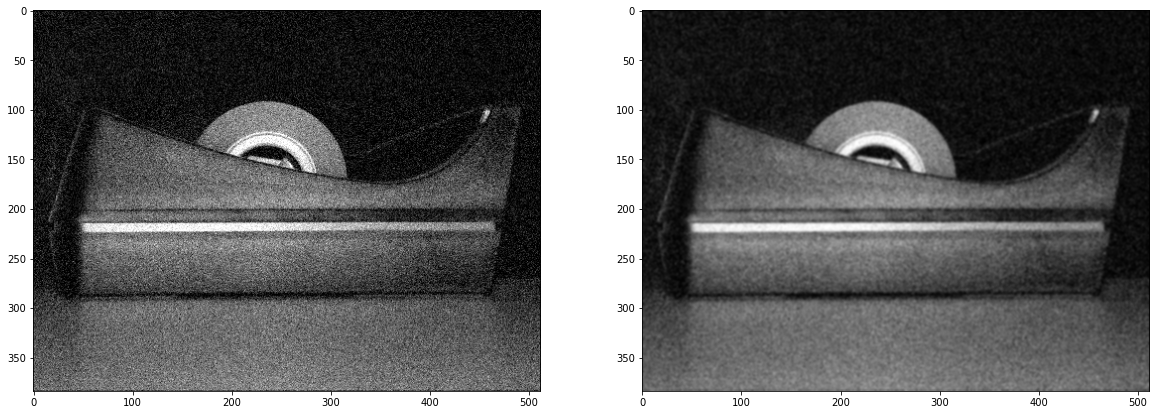

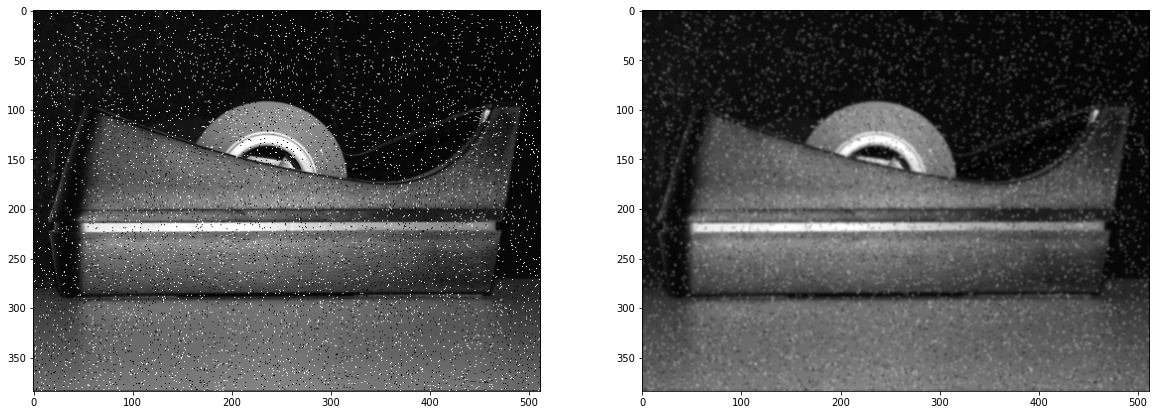

In [44]:
import cv2
import matplotlib.pyplot as plt
class GaussianFilter():
  """
  GaussianFilter, donot change the solve function. You may add any other class 
  functions or other functions in the colab file. but refrain for function/class
  definitions already given. These will be used to grade later on.
  """

  def solve(self, img, ksize=(5,5), sigma_x=0):
    """
    Solve function to perform gaussian filtering.

    :param img: noisy image
    :param ksize: representing the size of the kernel.
    :param sigma_x: standard deviation in X direction
    :rtype: uint8 (w,h)
    :return: solved image
    """
    # [TODO] Can use cv2 inbuilt 
    blur_img=cv2.GaussianBlur(img,ksize,sigma_x)
    return blur_img
image_number=9
image                       = cv2.imread(f"/content/dataset/Image{image_number}.png")
image                       = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
 
a=GaussianFilter()
Gaussian_filter=a.solve(gaussian_example) # gaussian_example is the noisy image generated by applying gaussian noise
plt.figure(figsize=(20,15))
plt.subplot(1,2,1)
show_gray(gaussian_example)
plt.subplot(1,2,2)
show_gray(Gaussian_filter) # Gaussian filter is the denoised image using cv2 library.
SNP_filter=a.solve(salt_and_pepper_example)
plt.figure(figsize=(20,15))
plt.subplot(1,2,1)
show_gray(salt_and_pepper_example)
plt.subplot(1,2,2)
show_gray(SNP_filter)
print(f"Gaussian filtering => GSN -> PSNR: {PSNR(image,Gaussian_filter):.2f} | MSE: {MSE(image,Gaussian_filter):.2f}")
print(f"Gaussian filtering => SNP -> PSNR: {PSNR(image,SNP_filter):.2f} | MSE: {MSE(image,SNP_filter):.2f}\n")
 